In [38]:
import pandas as pd
import numpy as np
import missingno as msno
"""
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')"""

df = pd.read_csv('fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [12]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.shape

(1296675, 22)

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.shape

(1296675, 22)

In [ ]:
df = df.drop_duplicates()
df.shape

(1296675, 22)

In [ ]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
trans_date_trans_time =  1274791
cc_num =  983
merchant =  693
-----> CATEGORICAL -----> category =  14
amt =  52928
first =  352
last =  481
-----> CATEGORICAL -----> gender =  2
street =  983
city =  894
state =  51
zip =  970
lat =  968
long =  969
city_pop =  879
job =  494
dob =  968
trans_num =  1296675
unix_time =  1274823
merch_lat =  1247805
merch_long =  1275745
-----> CATEGORICAL -----> is_fraud =  2


In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [ ]:
# Perform data cleaning operations
# Replace missing values with NaN
df.replace('', pd.NA, inplace=True)

# Drop unnecessary columns
# Calculate the percentage of missing values in each column
# the mean will give the proportion of True values, which represents the percentage of missing values in each column.
missing_percentages = df.isnull().mean() * 100

# Identify columns with high missing value percentages
high_missing_columns = missing_percentages[missing_percentages > 50].index.tolist()

# Identify columns with identical values
identical_columns = df.columns[df.nunique() == 1].tolist()

# Combine the lists of high missing value columns and identical value columns
unnecessary_columns = high_missing_columns + identical_columns

# Print the unnecessary columns
print("Unnecessary columns:")
print(high_missing_columns)
print(identical_columns)

Unnecessary columns:
[]
[]


<Axes: >

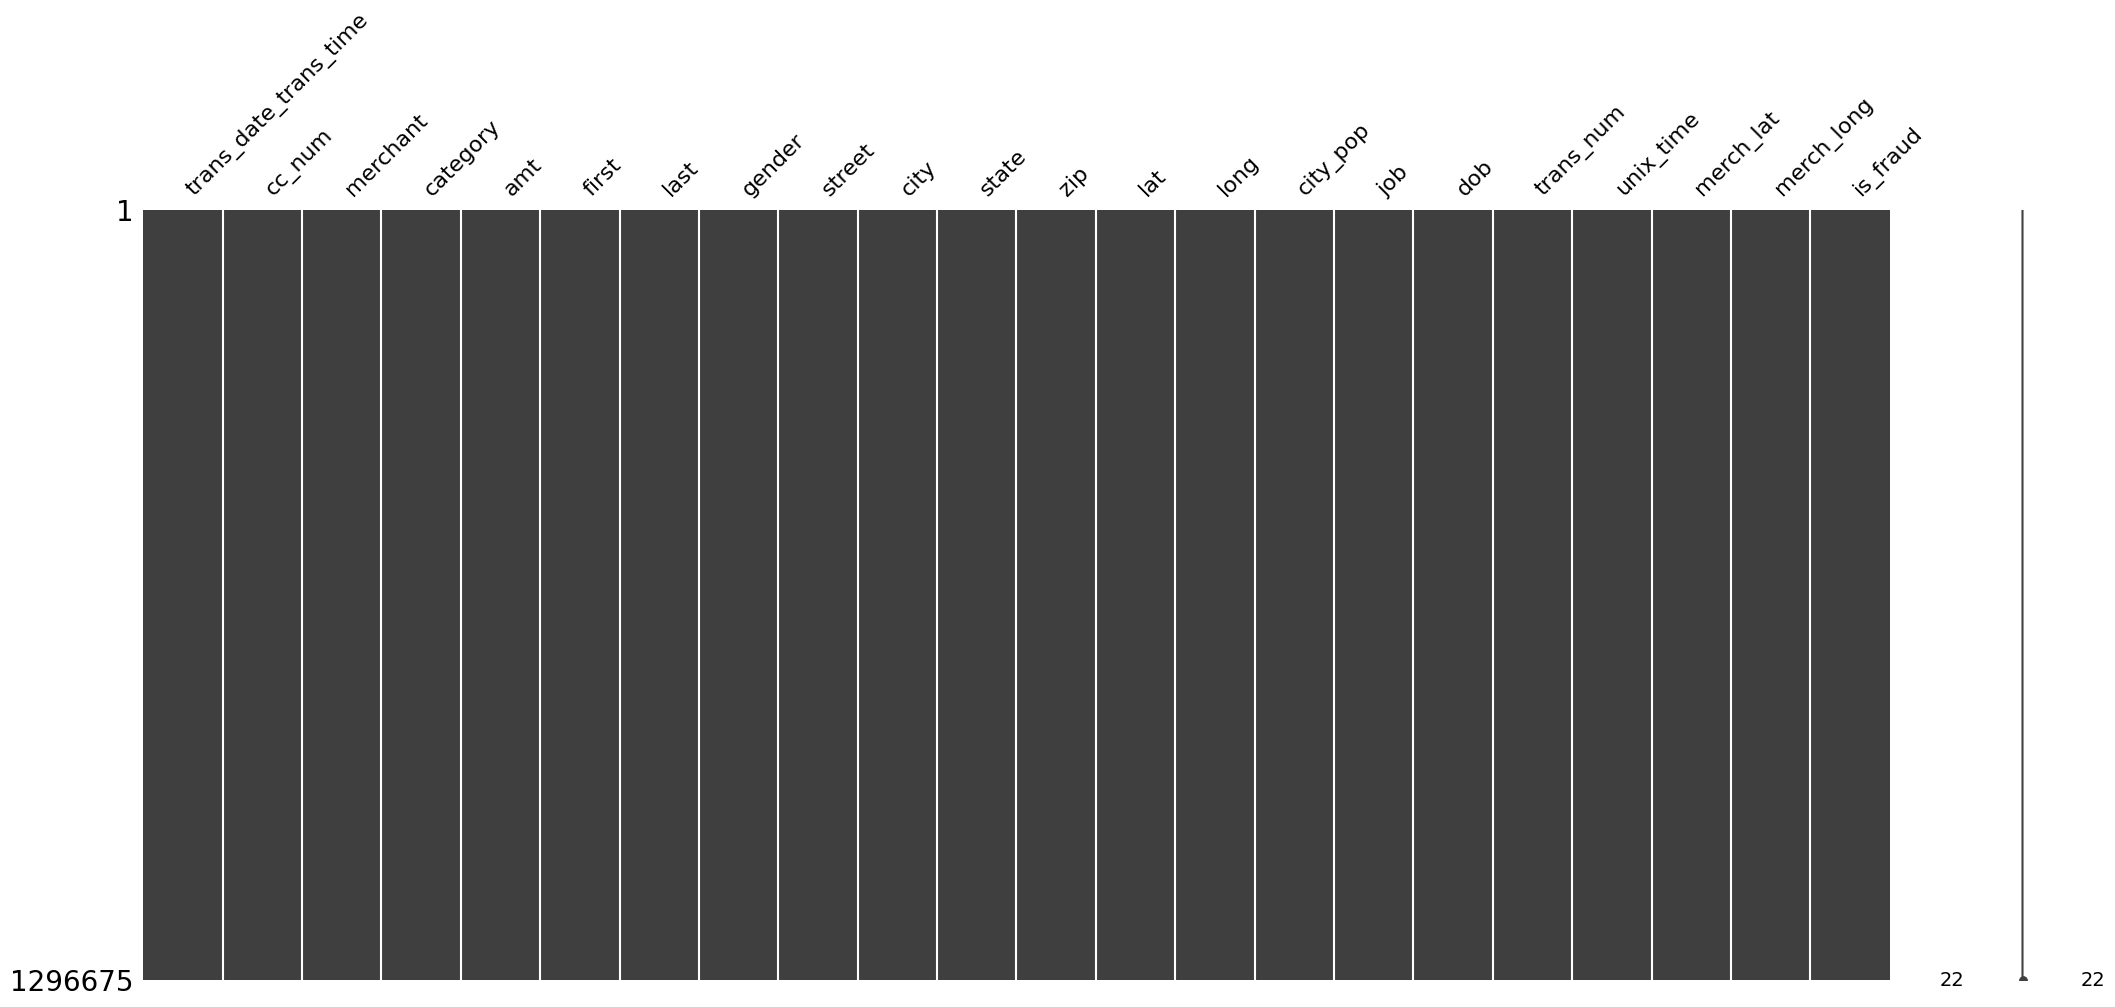

In [ ]:
msno.matrix(df)

In [ ]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


# univariate variable analysis

In [ ]:
import plotly.express as px

labels=["Genuine","Fraud"]

fraud_or_not = df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['is_fraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In [ ]:
print('Genuine:', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


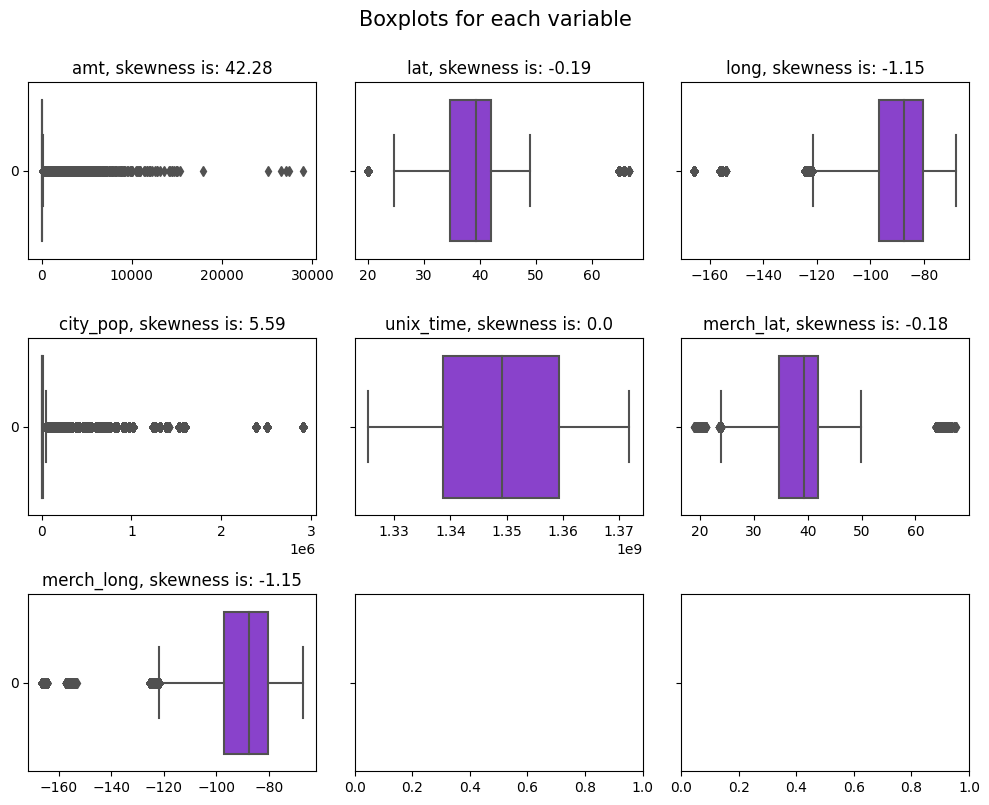

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['amt', 'lat','long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long']
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(10,8))
    fig.suptitle(suptitle,y=1, size=15)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i], color= 'blueviolet')
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

<Axes: xlabel='amt', ylabel='Density'>

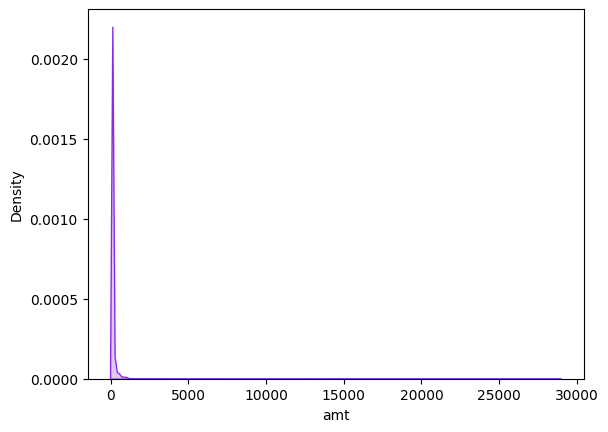

In [ ]:
sns.kdeplot(df["amt"], fill=True, color = 'blueviolet')

<Axes: xlabel='amt', ylabel='Density'>

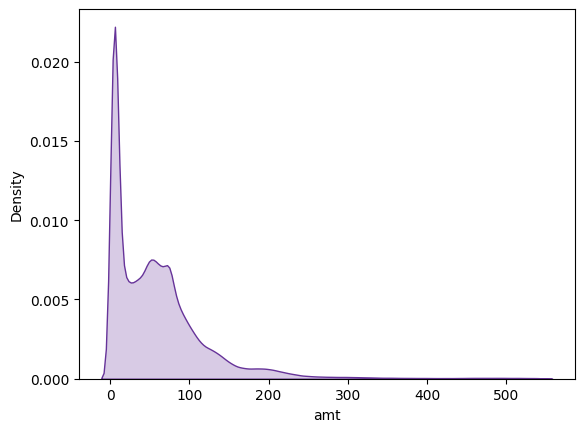

In [ ]:
p99 = df["amt"].quantile(0.99)
sns.kdeplot(x="amt", data=df[df["amt"] <= p99], fill=True, color = 'rebeccapurple')

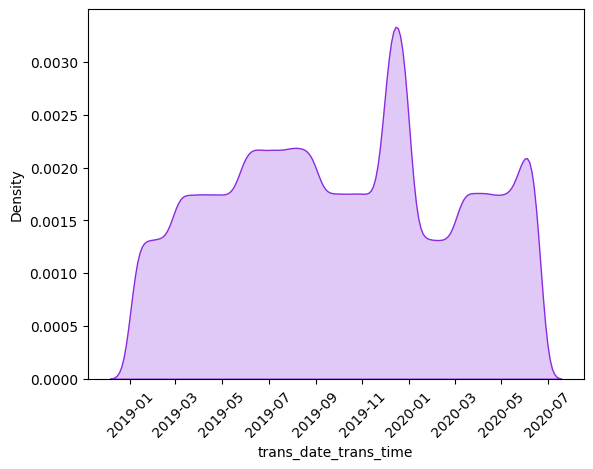

In [ ]:
sns.kdeplot(df["trans_date_trans_time"], fill=True, color = 'blueviolet')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='dob', ylabel='Density'>

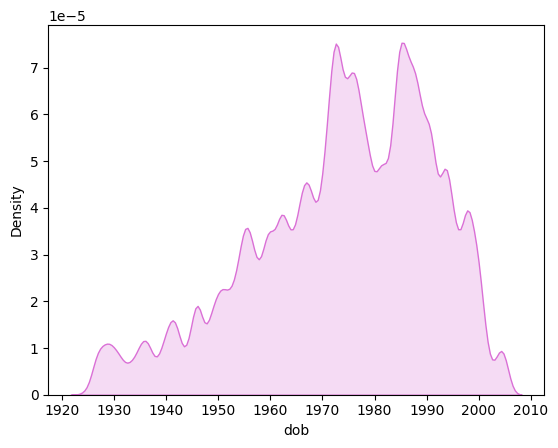

In [ ]:
sns.kdeplot(df["dob"], fill=True, color = 'orchid')

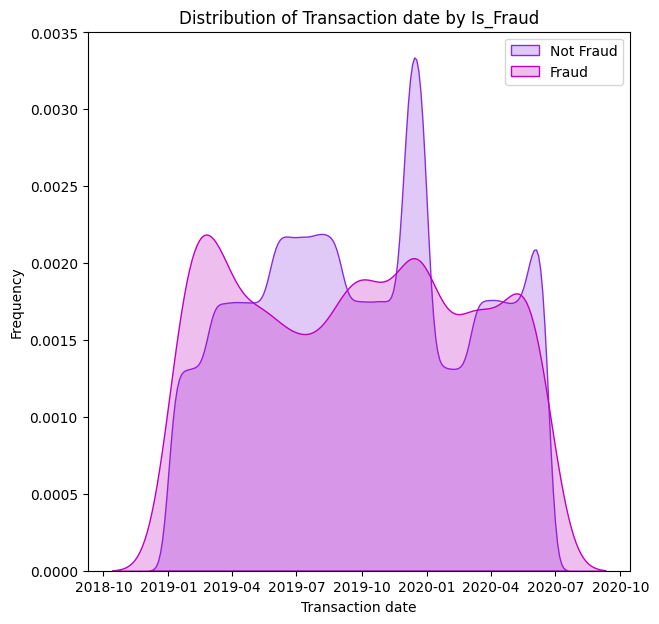

In [ ]:
not_fraud = df[df['is_fraud'] == 0]
fraud = df[df['is_fraud'] == 1]
plt.figure(figsize=(7,7))
sns.kdeplot(not_fraud.trans_date_trans_time, fill=True, label='Not Fraud', color = 'blueviolet')
sns.kdeplot(fraud.trans_date_trans_time, fill=True, label='Fraud', color = 'm')
plt.ylabel('Frequency')
plt.xlabel('Transaction date')
plt.title('Distribution of Transaction date by Is_Fraud')
plt.legend()

In [ ]:
!pip install cartopy

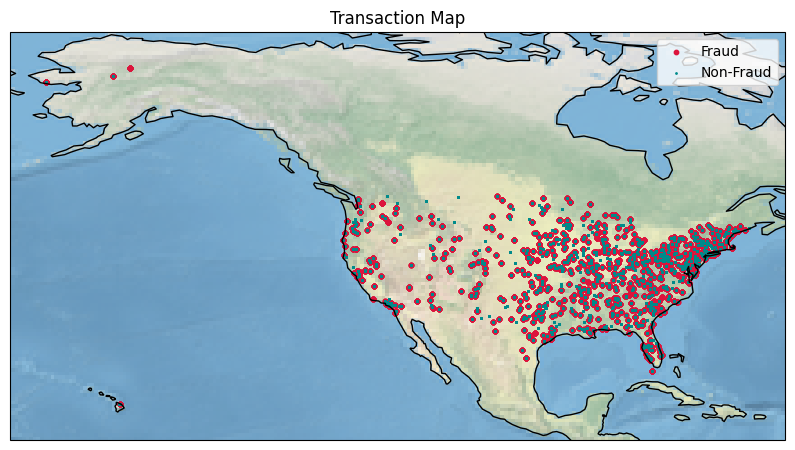

In [ ]:
import cartopy.crs as ccrs

# Create a Cartopy map with a specific projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()
ax.stock_img()

# Plot the transactions as scatter points
fraud_transactions = df[df['is_fraud'] == 1]
non_fraud_transactions = df[df['is_fraud'] == 0]

ax.scatter(fraud_transactions['long'], fraud_transactions['lat'], color='crimson', label='Fraud', s=10)
ax.scatter(non_fraud_transactions['long'], non_fraud_transactions['lat'], color='darkcyan', label='Non-Fraud', s=1)

# Set the map extent and title
min_lon, max_lon = df['long'].min(), df['long'].max()
min_lat, max_lat = df['lat'].min(), df['lat'].max()
ax.set_extent([min_lon - 5, max_lon + 5, min_lat - 5, max_lat + 5], crs=ccrs.PlateCarree())
ax.set_title('Transaction Map')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
fraud_transactions.shape

(7506, 22)

In [ ]:
non_fraud_transactions.shape

(1289169, 22)

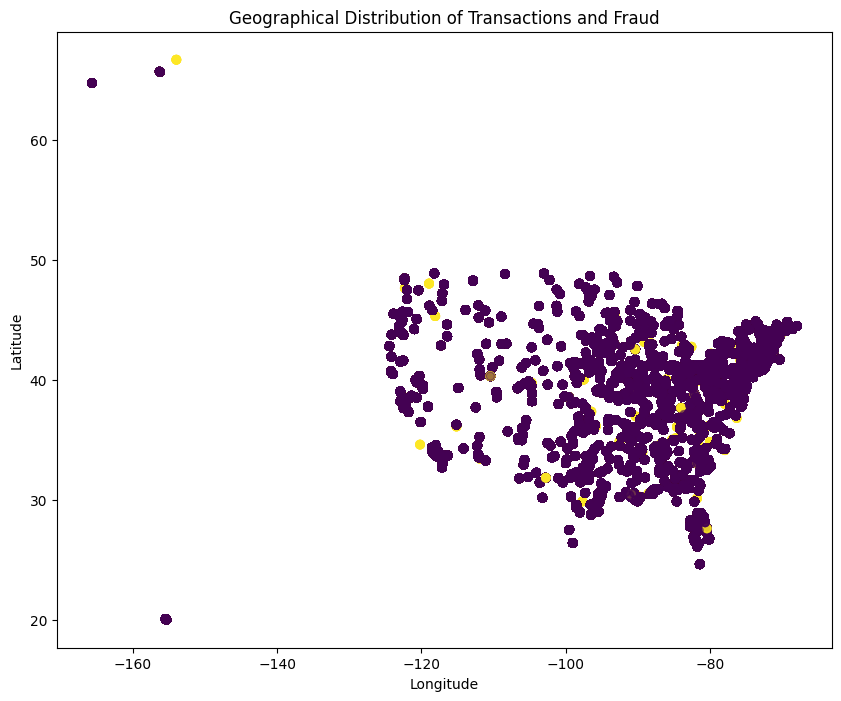

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], c=df['is_fraud'], alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

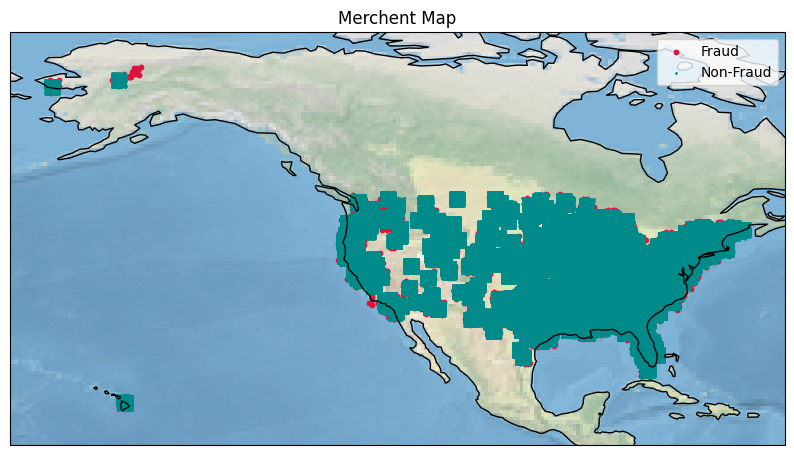

In [ ]:
# Create a Cartopy map with a specific projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other map features
ax.coastlines()
ax.stock_img()

# Plot the transactions as scatter points
fraud_transactions = df[df['is_fraud'] == 1]
non_fraud_transactions = df[df['is_fraud'] == 0]

ax.scatter(fraud_transactions['merch_long'], fraud_transactions['merch_lat'], color='crimson', label='Fraud', s=10)
ax.scatter(non_fraud_transactions['merch_long'], non_fraud_transactions['merch_lat'], color='darkcyan', label='Non-Fraud', s=1)

# Set the map extent and title
min_lon, max_lon = df['merch_long'].min(), df['merch_long'].max()
min_lat, max_lat = df['merch_lat'].min(), df['merch_lat'].max()
ax.set_extent([min_lon - 5, max_lon + 5, min_lat - 5, max_lat + 5], crs=ccrs.PlateCarree())
ax.set_title('Merchent Map')

# Add a legend
ax.legend()

# Show the plot
plt.show()

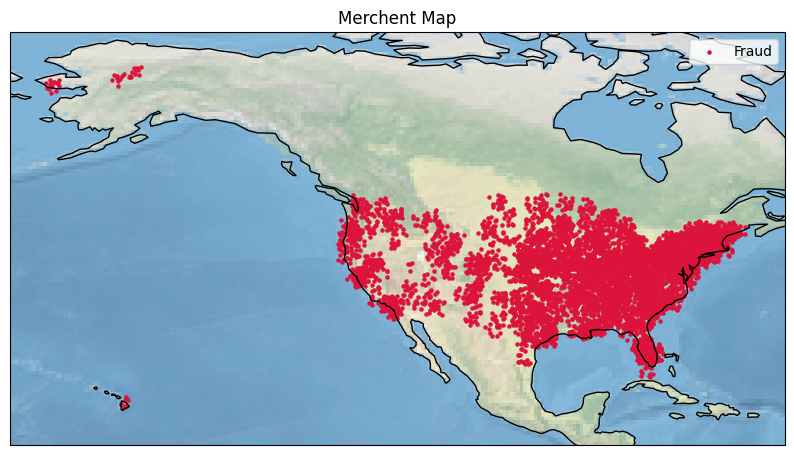

In [ ]:
# Create a Cartopy map with a specific projection
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
# Add coastlines and other map features
ax.coastlines()
ax.stock_img()
ax.scatter(fraud_transactions['merch_long'], fraud_transactions['merch_lat'], color='crimson', label='Fraud', s=5)
# Set the map extent and title
min_lon, max_lon = df['merch_long'].min(), df['merch_long'].max()
min_lat, max_lat = df['merch_lat'].min(), df['merch_lat'].max()
ax.set_extent([min_lon - 5, max_lon + 5, min_lat - 5, max_lat + 5], crs=ccrs.PlateCarree())
ax.set_title('Merchent Map')
# Add a legend
ax.legend()
# Show the plot
plt.show()

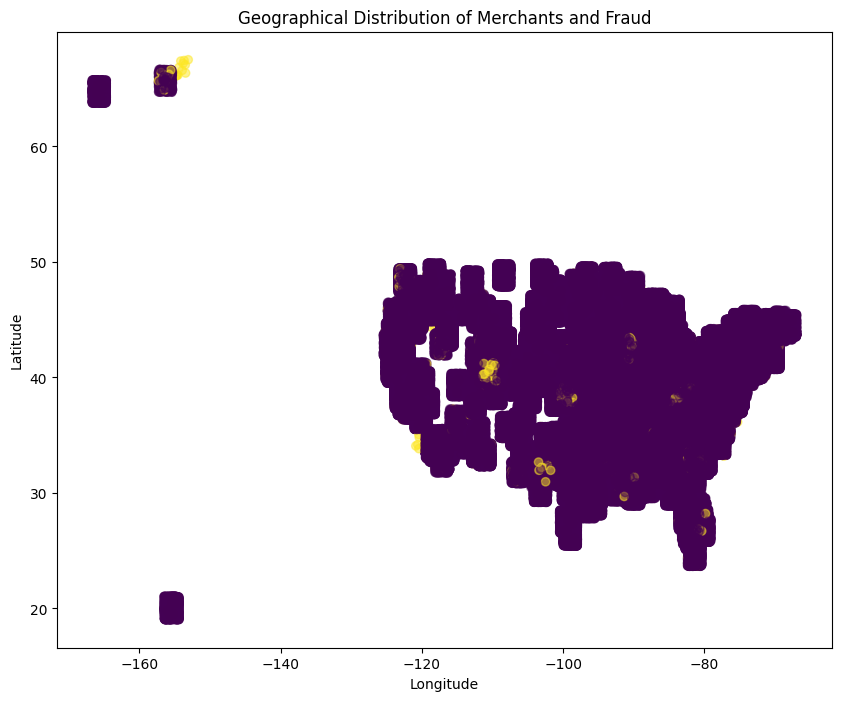

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(df['merch_long'], df['merch_lat'], c=df['is_fraud'], alpha=0.5)
plt.title('Geographical Distribution of Merchants and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

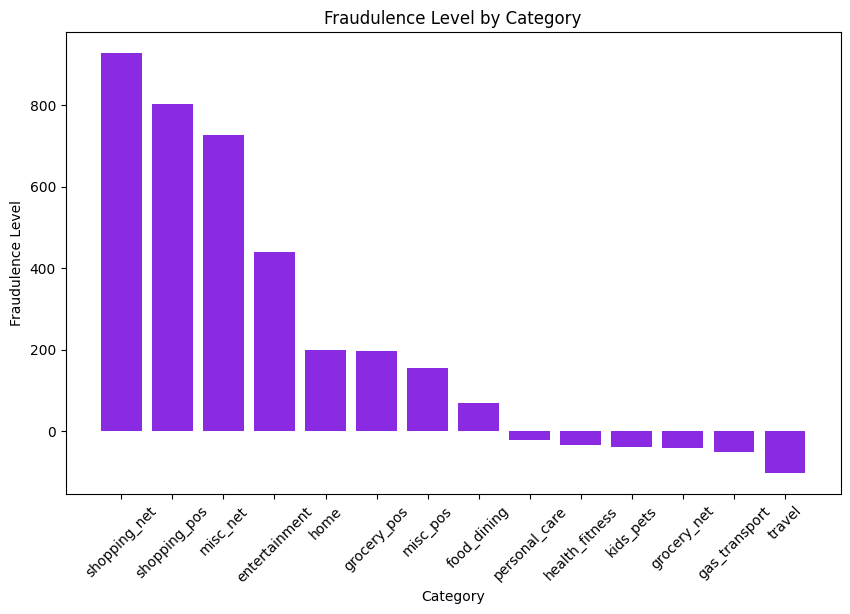

In [ ]:
# Calculate the average transaction amount for fraudulent transactions within each category
fraudulent_transactions = df[df['is_fraud'] == 1]
fraudulent_average_amounts = fraudulent_transactions.groupby('category')['amt'].mean()

# Calculate the average transaction amount for non-fraudulent transactions within each category
non_fraudulent_transactions = df[df['is_fraud'] == 0]
non_fraudulent_average_amounts = non_fraudulent_transactions.groupby('category')['amt'].mean()

# Calculate the difference between average amounts to measure fraudulence level
fraudulence_level = fraudulent_average_amounts - non_fraudulent_average_amounts

# Sort the fraudulence level in descending order
fraudulence_level = fraudulence_level.sort_values(ascending=False)

# Create a bar plot to visualize the fraudulence level
plt.figure(figsize=(10, 6))
plt.bar(fraudulence_level.index, fraudulence_level.values, color='blueviolet')

# Set plot title and axis labels
plt.title('Fraudulence Level by Category')
plt.xlabel('Category')
plt.ylabel('Fraudulence Level')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

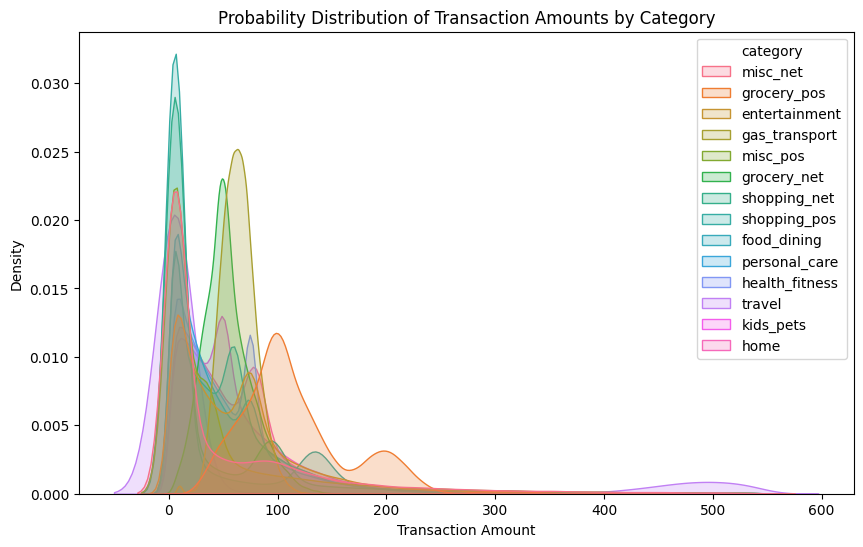

In [ ]:
#since we saw that amt was highy skewed we only use the first 99 % of the data (data with 'amt' below 99th percentile)
p99 = df["amt"].quantile(0.99)
data = df[df["amt"] <= p99]

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x="amt", hue="category", fill=True, common_norm=False)

# Set plot title and axis labels
plt.title("Probability Distribution of Transaction Amounts by Category")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")

# Show the plot
plt.show()

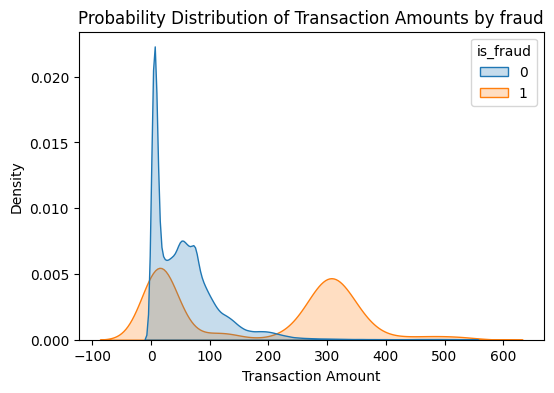

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x="amt", hue="is_fraud", fill=True, common_norm = False)
plt.title("Probability Distribution of Transaction Amounts by fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

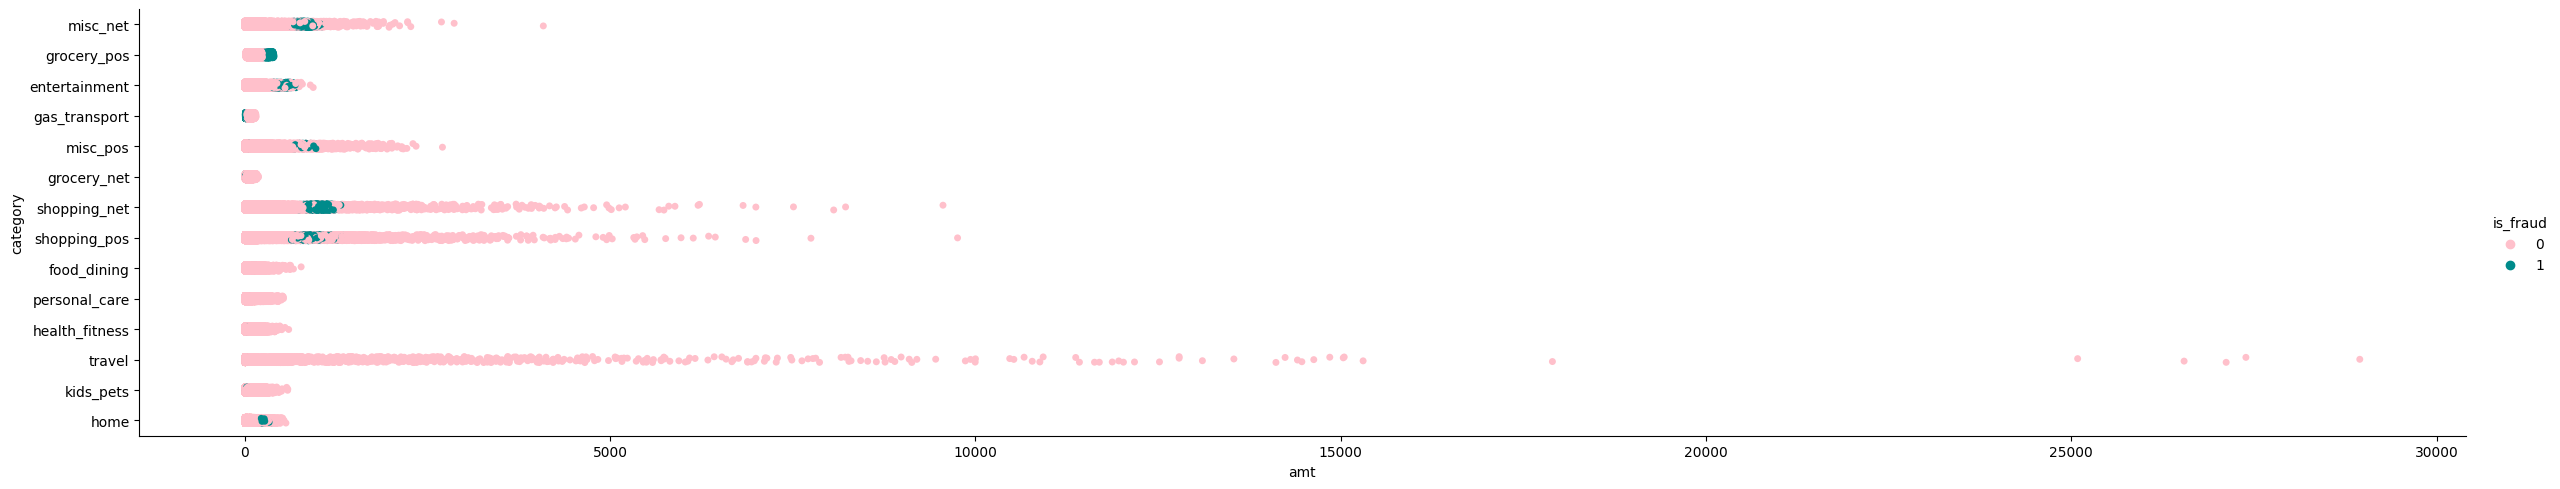

In [ ]:
sns.catplot(x='amt',y='category',data=df,hue='is_fraud',aspect=5, palette = ['pink', 'darkcyan'])

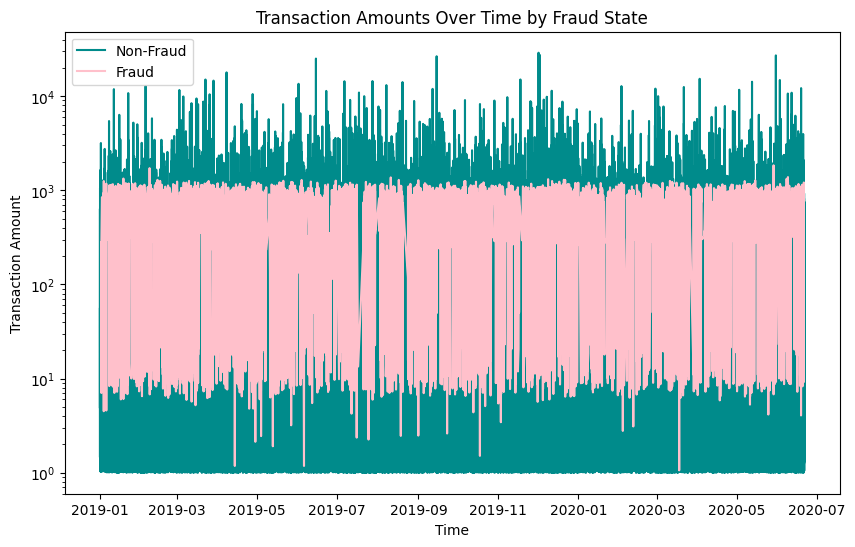

In [ ]:
# Group the data by fraud state and timestamp, and calculate the total transaction amount
grouped_data = df.groupby(['is_fraud', 'trans_date_trans_time'])['amt'].sum().reset_index()

fraud_data = grouped_data[grouped_data['is_fraud'] == True]
non_fraud_data = grouped_data[grouped_data['is_fraud'] == False]

plt.figure(figsize=(10, 6))


# Plot the transaction amounts for non-fraud cases
plt.plot(non_fraud_data['trans_date_trans_time'], non_fraud_data['amt'], color='darkcyan', label='Non-Fraud')

# Plot the transaction amounts for fraud cases
plt.plot(fraud_data['trans_date_trans_time'], fraud_data['amt'], color='pink', label='Fraud')

plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts Over Time by Fraud State')
plt.legend()

# Set the y-axis to a logarithmic scale
plt.yscale('log')

plt.show()

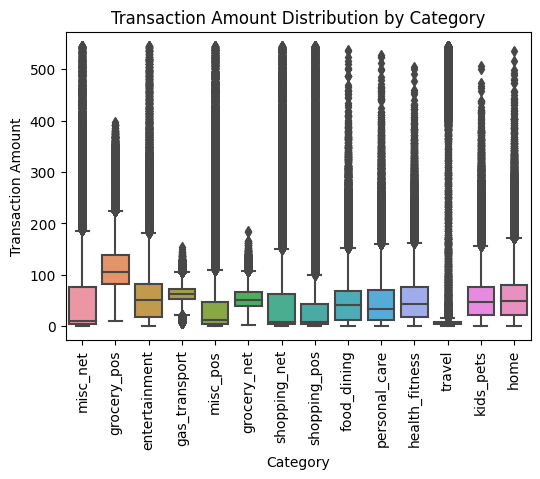

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="category", y="amt")
plt.title("Transaction Amount Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Transaction Amount")
plt.xticks(rotation=90)
plt.show()

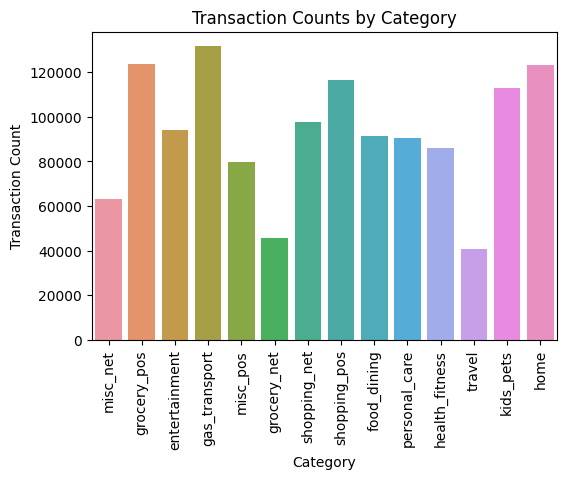

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='category')
plt.title("Transaction Counts by Category")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()

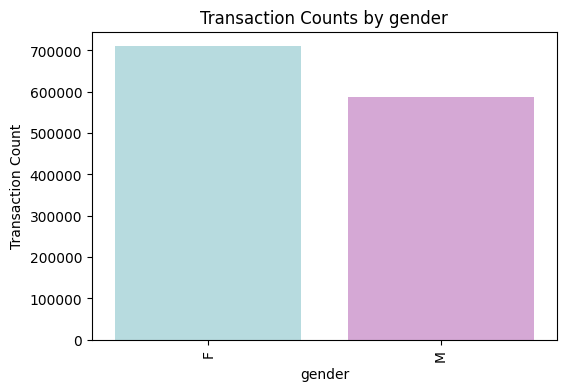

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette=['powderblue', 'plum'])
plt.title("Transaction Counts by gender")
plt.xlabel("gender")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()

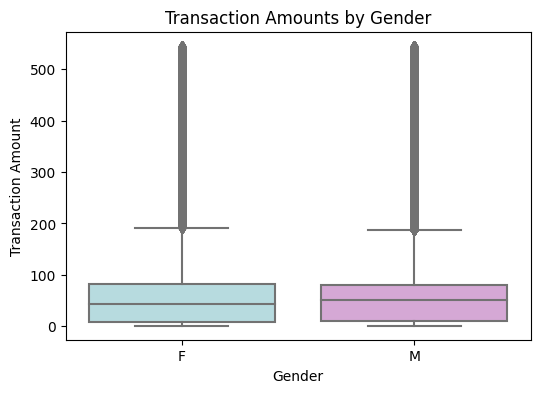

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='gender', y='amt',  palette=['powderblue', 'plum'])
plt.title("Transaction Amounts by Gender")
plt.xlabel("Gender")
plt.ylabel("Transaction Amount")
plt.show()

3735 3771


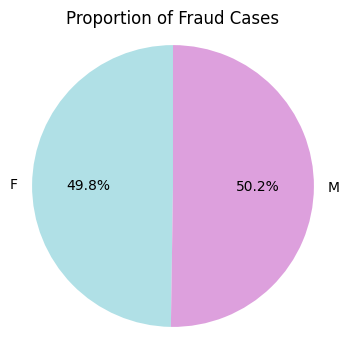

In [ ]:
female_fraud_count = df[(df['gender'] == 'F') & (df['is_fraud'] == 1)].shape[0]
male_fraud_count = df[(df['gender'] == 'M') & (df['is_fraud'] == 1)].shape[0]
print(female_fraud_count,male_fraud_count)

fraud_labels = ['F', 'M']
fraud_counts = [female_fraud_count, male_fraud_count]

plt.figure(figsize=(4, 4))
plt.pie(fraud_counts, labels=fraud_labels, autopct='%1.1f%%', startangle=90, colors = ['powderblue', 'plum'])
plt.title("Proportion of Fraud Cases")
plt.axis('equal')
plt.show()

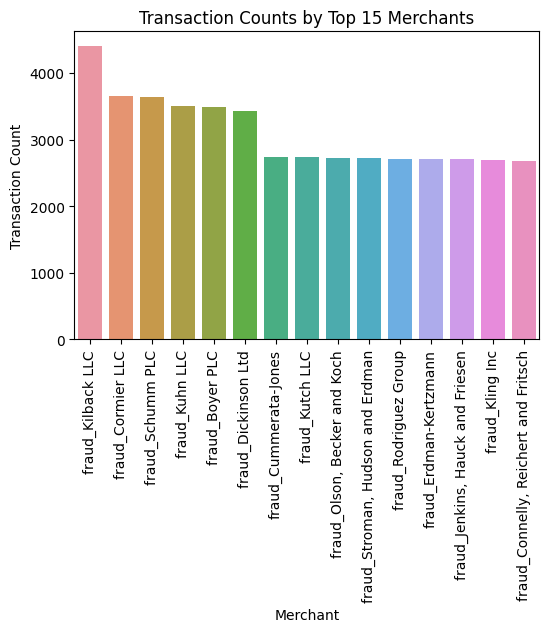

In [ ]:
top_15_merchants = df['merchant'].value_counts().nlargest(15).sort_values(ascending=False).index

plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['merchant'].isin(top_15_merchants)], x='merchant', order=top_15_merchants)
plt.title("Transaction Counts by Top 15 Merchants")
plt.xlabel("Merchant")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-40-74efef11cd9c>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



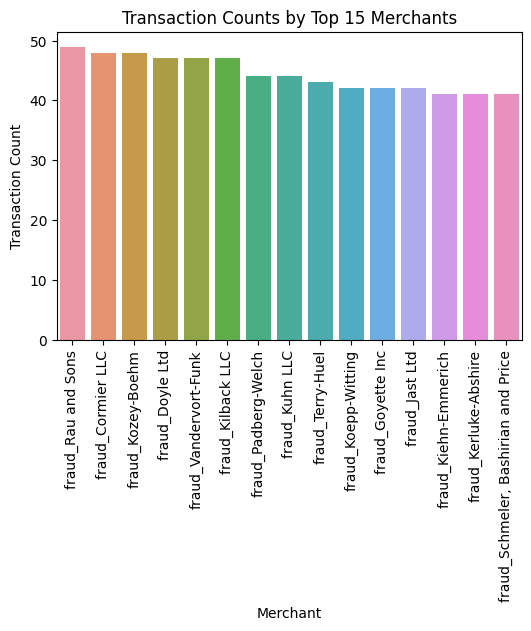

In [ ]:
fraud = df[df['is_fraud']==1]
top_15_merchants = fraud['merchant'].value_counts().nlargest(15).sort_values(ascending=False).index

plt.figure(figsize=(6, 4))
sns.countplot(data=fraud[df['merchant'].isin(top_15_merchants)], x='merchant', order=top_15_merchants)
plt.title("Transaction Counts by Top 15 Merchants")
plt.xlabel("Merchant")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.show()

## feture transformation and engineering



In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)  # Features (independent variables)
y = df['is_fraud']  # Target variable (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df = pd.concat([X_train, y_train], axis=1).reset_index()
df_test = pd.concat([X_test, y_test], axis=1).reset_index()

In [ ]:
df

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,330201,2019-06-06 14:43:31,4640395708703,fraud_Kris-Kertzmann,travel,6.51,Melissa,Krause,F,67632 Martin Gateway,Fordoche,LA,70732,30.6576,-91.6264,1178,Community education officer,1951-06-13,f3ac97659cc47c9bc0ecec59ed82cdfc,1338993811,31.189017,-91.426377,0
1,798518,2019-12-03 19:26:48,3553629419254918,"fraud_Parker, Nolan and Trantow",entertainment,20.17,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,d446bcc2bf6386d769f62931983f5573,1354562808,47.373663,-122.739095,0
2,1260375,2020-06-08 12:02:43,4089096483689733451,fraud_Schumm PLC,health_fitness,35.85,Debra,Stark,F,686 Linda Rest,Kilgore,TX,75662,32.3836,-94.8653,24536,Multimedia programmer,1983-10-14,fd829fdc4c0beee7a7feccec99e441cd,1370692963,31.989881,-95.371119,0
3,412511,2019-07-06 01:46:54,343746486082492,fraud_Kutch Group,grocery_net,42.21,Jeffrey,Munoz,M,836 Stephanie Union,Cedar,MI,49621,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,9cd84586238291b8f64e25931d211539,1341539214,45.377530,-86.450595,0
4,344644,2019-06-10 23:34:00,180067151859700,fraud_Gottlieb Group,kids_pets,57.24,Karen,Ryan,F,82468 Michelle Village Suite 556,Joliet,IL,60432,41.5378,-88.0572,128354,"Teacher, secondary school",1992-01-20,e63a64d507462095e9e31303bf1a6401,1339371240,42.372906,-87.112752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,110268,2019-03-04 02:49:28,6528911529051375,fraud_Sporer Inc,gas_transport,72.38,Diane,Smith,F,195 Murray Overpass Apt. 384,Winter,WI,54896,45.8327,-91.0144,1478,Neurosurgeon,1965-04-27,e2e57e418ddbd3760606d622285240cd,1330829368,45.043710,-90.231846,0
1037336,259178,2019-05-09 06:54:04,377895991033232,fraud_Gislason Group,misc_pos,2.33,Kimberly,Myers,F,6881 King Isle Suite 228,Higganum,CT,6441,41.4682,-72.5751,5438,"Librarian, academic",1964-11-17,abbf650ee867f8c8c2b8b751d7080656,1336546444,40.711495,-71.670634,0
1037337,131932,2019-03-13 21:46:27,3583293909206278,fraud_Wuckert-Goldner,home,118.27,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,NM,87117,35.0203,-106.5503,310,"Surveyor, land/geomatics",1978-09-30,71bb8153853c951bd06edb1c782e544d,1331675187,34.849069,-106.219762,0
1037338,671155,2019-10-13 09:28:26,30143713661454,fraud_Mayert Group,shopping_pos,5.60,Nicholas,Thornton,M,5270 Megan Burg Suite 756,Halma,MN,56729,48.6669,-96.5969,140,"Embryologist, clinical",1942-01-06,0bb27a5a4fdae46a6c80f428ff746349,1350120506,47.807830,-97.498754,0


In [ ]:
df_test

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1045211,2020-03-09 15:09:26,577588686219,fraud_Towne LLC,misc_pos,194.51,James,Strickland,M,25454 Leonard Lake,Spring Church,PA,15686,40.6153,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,1362841766,40.420453,-78.865012,0
1,547406,2019-08-22 15:49:01,30376238035123,fraud_Friesen Ltd,health_fitness,52.32,Cynthia,Davis,F,7177 Steven Forges,Sixes,OR,97476,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,1345650541,42.758860,-123.636337,0
2,110142,2019-03-04 01:34:16,4658490815480264,fraud_Mohr Inc,shopping_pos,6.53,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,1330824856,40.475159,-78.898190,0
3,1285953,2020-06-16 20:04:38,3514897282719543,fraud_Gaylord-Powlowski,home,7.33,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,14425,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,1371413078,43.767506,-76.542384,0
4,271705,2019-05-14 05:54:48,6011381817520024,"fraud_Christiansen, Goyette and Schamberger",gas_transport,64.29,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,WY,82221,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,1336974888,41.040392,-104.092324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259330,402969,2019-07-01 19:36:16,3543591270174051,fraud_Thompson-Gleason,health_fitness,52.17,Margaret,Lam,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,1972-10-04,99b01f405becf6e24a56b42971a1b5c7,1341171376,40.610144,-79.533882,0
259331,1121903,2020-04-12 13:25:48,4742883543039288059,fraud_Schimmel-Olson,kids_pets,42.34,Cassandra,Sanders,F,78117 George Mountains,Paauilo,HI,96776,20.0271,-155.3697,1490,"Scientist, research (maths)",1991-04-13,cf79802062a5fac5ebdf06fa9b169943,1365773148,19.051052,-155.629498,0
259332,55293,2019-02-02 21:42:45,4839043708100390,fraud_Roberts-Beahan,misc_pos,95.79,Meredith,Campbell,F,043 Hanson Turnpike,Hedrick,IA,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,bdc3a5e9bb58fd77ea224a6a072e7983,1328218965,41.491479,-91.379111,0
259333,1150396,2020-04-24 22:07:43,6011104316292105,fraud_Kilback and Sons,entertainment,5.64,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,Drakes Branch,VA,23937,36.9688,-78.5615,1970,Energy engineer,1985-09-02,bdb6e0fb155f8d137474e2d11557ced6,1366841263,36.199971,-79.548140,0


In [15]:
print(df['merchant'].str.startswith('fraud_').all(), df_test['merchant'].str.startswith('fraud_').all())

True True


In [16]:
df['merchant'] = df['merchant'].str.replace('fraud_', '', 1)
df_test['merchant'] = df_test['merchant'].str.replace('fraud_', '', 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

df['amt'] = scaler.fit_transform(df[['amt']])

df_test['amt'] = scaler.fit_transform(df_test[['amt']])

In [18]:
import datetime as dt

#extra datetime elements
df['year'] = df.trans_date_trans_time.dt.year
df['month'] = df.trans_date_trans_time.dt.month
df['day'] = df.trans_date_trans_time.dt.day
df['hour'] = df.trans_date_trans_time.dt.hour
df['date'] = df.trans_date_trans_time.dt.date
df['weekday'] = df.trans_date_trans_time.dt.dayofweek
df['age'] = (df.trans_date_trans_time - df.dob).dt.days // 365



#extra datetime elements
df_test['year'] = df_test.trans_date_trans_time.dt.year
df_test['month'] = df_test.trans_date_trans_time.dt.month
df_test['day'] = df_test.trans_date_trans_time.dt.day
df_test['hour'] = df_test.trans_date_trans_time.dt.hour
df_test['date'] = df_test.trans_date_trans_time.dt.date
df_test['weekday'] = df_test.trans_date_trans_time.dt.dayofweek
df_test['age'] = (df_test.trans_date_trans_time - df_test.dob).dt.days // 365

df

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,date,weekday,age
0,330201,2019-06-06 14:43:31,4640395708703,Kris-Kertzmann,travel,0.000201,Melissa,Krause,F,67632 Martin Gateway,Fordoche,LA,70732,30.6576,-91.6264,1178,Community education officer,1951-06-13,f3ac97659cc47c9bc0ecec59ed82cdfc,1338993811,31.189017,-91.426377,0,2019,6,6,14,2019-06-06,3,68
1,798518,2019-12-03 19:26:48,3553629419254918,"Parker, Nolan and Trantow",entertainment,0.000700,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,d446bcc2bf6386d769f62931983f5573,1354562808,47.373663,-122.739095,0,2019,12,3,19,2019-12-03,1,35
2,1260375,2020-06-08 12:02:43,4089096483689733451,Schumm PLC,health_fitness,0.001272,Debra,Stark,F,686 Linda Rest,Kilgore,TX,75662,32.3836,-94.8653,24536,Multimedia programmer,1983-10-14,fd829fdc4c0beee7a7feccec99e441cd,1370692963,31.989881,-95.371119,0,2020,6,8,12,2020-06-08,0,36
3,412511,2019-07-06 01:46:54,343746486082492,Kutch Group,grocery_net,0.001505,Jeffrey,Munoz,M,836 Stephanie Union,Cedar,MI,49621,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,9cd84586238291b8f64e25931d211539,1341539214,45.377530,-86.450595,0,2019,7,6,1,2019-07-06,5,43
4,344644,2019-06-10 23:34:00,180067151859700,Gottlieb Group,kids_pets,0.002053,Karen,Ryan,F,82468 Michelle Village Suite 556,Joliet,IL,60432,41.5378,-88.0572,128354,"Teacher, secondary school",1992-01-20,e63a64d507462095e9e31303bf1a6401,1339371240,42.372906,-87.112752,0,2019,6,10,23,2019-06-10,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,110268,2019-03-04 02:49:28,6528911529051375,Sporer Inc,gas_transport,0.002606,Diane,Smith,F,195 Murray Overpass Apt. 384,Winter,WI,54896,45.8327,-91.0144,1478,Neurosurgeon,1965-04-27,e2e57e418ddbd3760606d622285240cd,1330829368,45.043710,-90.231846,0,2019,3,4,2,2019-03-04,0,53
1037336,259178,2019-05-09 06:54:04,377895991033232,Gislason Group,misc_pos,0.000049,Kimberly,Myers,F,6881 King Isle Suite 228,Higganum,CT,6441,41.4682,-72.5751,5438,"Librarian, academic",1964-11-17,abbf650ee867f8c8c2b8b751d7080656,1336546444,40.711495,-71.670634,0,2019,5,9,6,2019-05-09,3,54
1037337,131932,2019-03-13 21:46:27,3583293909206278,Wuckert-Goldner,home,0.004282,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,NM,87117,35.0203,-106.5503,310,"Surveyor, land/geomatics",1978-09-30,71bb8153853c951bd06edb1c782e544d,1331675187,34.849069,-106.219762,0,2019,3,13,21,2019-03-13,2,40
1037338,671155,2019-10-13 09:28:26,30143713661454,Mayert Group,shopping_pos,0.000168,Nicholas,Thornton,M,5270 Megan Burg Suite 756,Halma,MN,56729,48.6669,-96.5969,140,"Embryologist, clinical",1942-01-06,0bb27a5a4fdae46a6c80f428ff746349,1350120506,47.807830,-97.498754,0,2019,10,13,9,2019-10-13,6,77


<Figure size 1000x600 with 0 Axes>

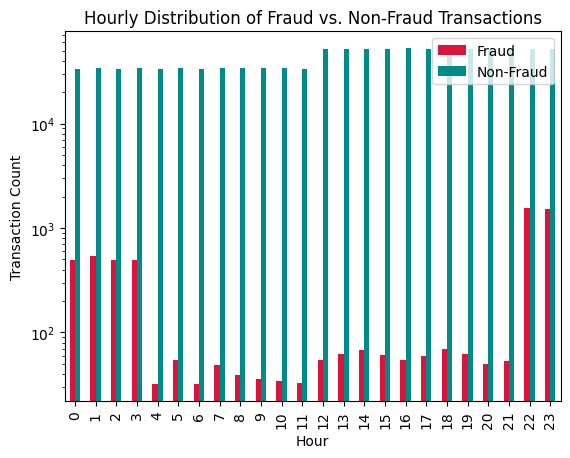

In [ ]:
# Filter the DataFrame for fraud and non-fraud transactions
fraud_transactions = df[df['is_fraud'] == 1]
non_fraud_transactions = df[df['is_fraud'] == 0]

# Count the occurrences of each hour for fraud and non-fraud transactions
fraud_hour_counts = fraud_transactions['hour'].value_counts().sort_index()
non_fraud_hour_counts = non_fraud_transactions['hour'].value_counts().sort_index()

# Merge the hour counts for fraud and non-fraud transactions into a single DataFrame
hour_counts = pd.DataFrame({'Fraud': fraud_hour_counts, 'Non-Fraud': non_fraud_hour_counts})

# Create a bar plot to visualize the hourly distribution of fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color=['crimson', 'darkcyan'])

# Set plot title and axis labels
plt.title('Hourly Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.yscale('log')
# Show the plot
plt.show()

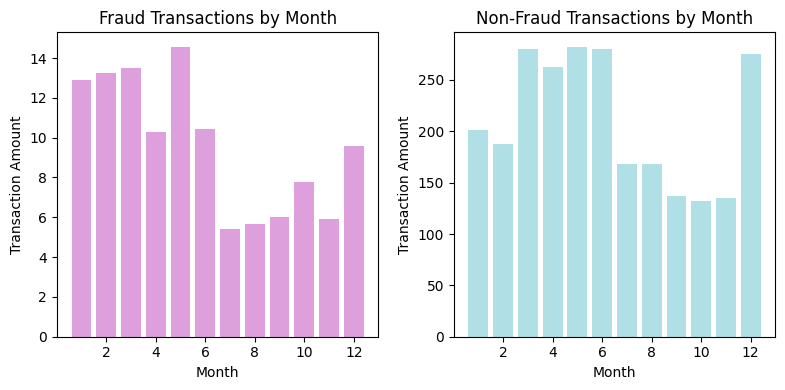

In [ ]:
# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotting fraud transactions
axs[0].bar(fraud_transactions.groupby('month')['amt'].sum().index, fraud_transactions.groupby('month')['amt'].sum(), color='plum')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Transaction Amount')
axs[0].set_title('Fraud Transactions by Month')

# Plotting non-fraud transactions
axs[1].bar(non_fraud_transactions.groupby('month')['amt'].sum().index, non_fraud_transactions.groupby('month')['amt'].sum(), color='powderblue')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Transaction Amount')
axs[1].set_title('Non-Fraud Transactions by Month')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

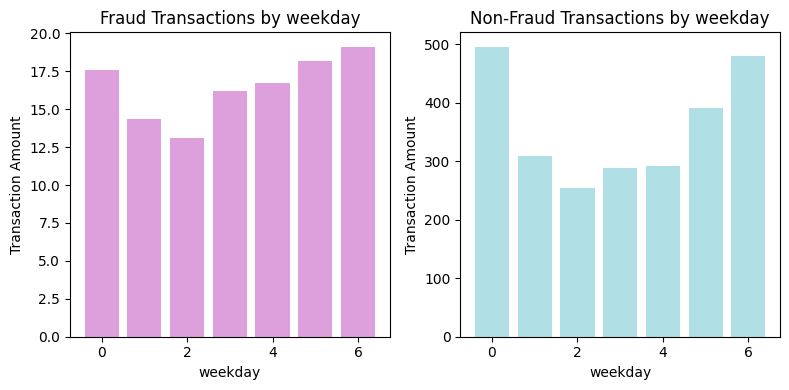

In [ ]:
# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotting fraud transactions
axs[0].bar(fraud_transactions.groupby('weekday')['amt'].sum().index, fraud_transactions.groupby('weekday')['amt'].sum(), color='plum')
axs[0].set_xlabel('weekday')
axs[0].set_ylabel('Transaction Amount')
axs[0].set_title('Fraud Transactions by weekday')

# Plotting non-fraud transactions
axs[1].bar(non_fraud_transactions.groupby('weekday')['amt'].sum().index, non_fraud_transactions.groupby('weekday')['amt'].sum(), color='powderblue')
axs[1].set_xlabel('weekday')
axs[1].set_ylabel('Transaction Amount')
axs[1].set_title('Non-Fraud Transactions by weekday')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

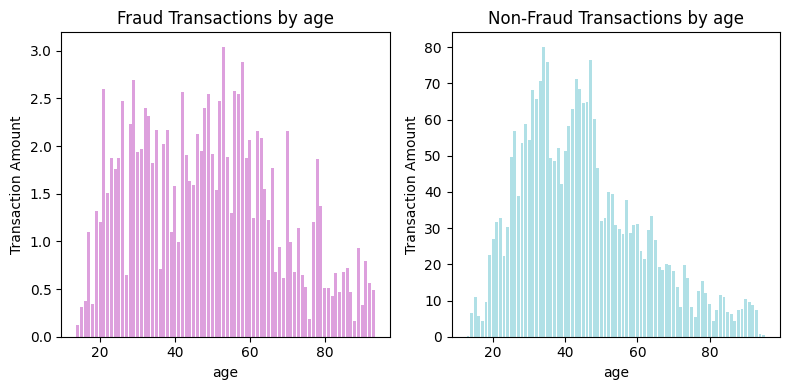

In [ ]:
# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotting fraud transactions
axs[0].bar(fraud_transactions.groupby('age')['amt'].sum().index, fraud_transactions.groupby('age')['amt'].sum(), color='plum')
axs[0].set_xlabel('age')
axs[0].set_ylabel('Transaction Amount')
axs[0].set_title('Fraud Transactions by age')

# Plotting non-fraud transactions
axs[1].bar(non_fraud_transactions.groupby('age')['amt'].sum().index, non_fraud_transactions.groupby('age')['amt'].sum(), color='powderblue')
axs[1].set_xlabel('age')
axs[1].set_ylabel('Transaction Amount')
axs[1].set_title('Non-Fraud Transactions by age')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# checking to see if each cc_num is associated with only one (first, last)
grouped = df.groupby('cc_num')['first', 'last'].agg(lambda x: tuple(x)).reset_index()
grouped[grouped.duplicated(subset=['cc_num'], keep=False)]

<ipython-input-52-5f69b05e8208>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cc_num,first,last


since this dataset is empty, each cc_num is unique to each person and can be the customers's identifier.

In [19]:
# Total number of transactions per customer
df['total_trans_num'] = df.groupby(['cc_num', 'first', 'last'])['cc_num'].transform('count')

# Average transaction amount per customer
df['avg_amt'] = df.groupby(['cc_num', 'first', 'last'])['amt'].transform('mean')

# Total number of transactions per customer
df_test['total_trans_num'] = df_test.groupby(['cc_num', 'first', 'last'])['cc_num'].transform('count')

# Average transaction amount per customer
df_test['avg_amt'] = df_test.groupby(['cc_num', 'first', 'last'])['amt'].transform('mean')

In [20]:
tmp = df.sort_values(['cc_num', 'trans_date_trans_time'])
df['mins_since_prev_trans'] = tmp.groupby(['cc_num', 'first', 'last'])['trans_date_trans_time'].diff().dt.total_seconds() / 60
del tmp
df['mins_since_prev_trans'].fillna(-1, inplace=True)
df

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,date,weekday,age,total_trans_num,avg_amt,mins_since_prev_trans
0,330201,2019-06-06 14:43:31,4640395708703,Kris-Kertzmann,travel,0.000201,Melissa,Krause,F,67632 Martin Gateway,Fordoche,LA,70732,30.6576,-91.6264,1178,Community education officer,1951-06-13,f3ac97659cc47c9bc0ecec59ed82cdfc,1338993811,31.189017,-91.426377,0,2019,6,6,14,2019-06-06,3,68,1611,0.002213,827.316667
1,798518,2019-12-03 19:26:48,3553629419254918,"Parker, Nolan and Trantow",entertainment,0.000700,Sharon,Johnson,F,7202 Jeffrey Mills,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,d446bcc2bf6386d769f62931983f5573,1354562808,47.373663,-122.739095,0,2019,12,3,19,2019-12-03,1,35,2439,0.001932,62.550000
2,1260375,2020-06-08 12:02:43,4089096483689733451,Schumm PLC,health_fitness,0.001272,Debra,Stark,F,686 Linda Rest,Kilgore,TX,75662,32.3836,-94.8653,24536,Multimedia programmer,1983-10-14,fd829fdc4c0beee7a7feccec99e441cd,1370692963,31.989881,-95.371119,0,2020,6,8,12,2020-06-08,0,36,1240,0.003286,268.350000
3,412511,2019-07-06 01:46:54,343746486082492,Kutch Group,grocery_net,0.001505,Jeffrey,Munoz,M,836 Stephanie Union,Cedar,MI,49621,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,9cd84586238291b8f64e25931d211539,1341539214,45.377530,-86.450595,0,2019,7,6,1,2019-07-06,5,43,1229,0.002319,414.966667
4,344644,2019-06-10 23:34:00,180067151859700,Gottlieb Group,kids_pets,0.002053,Karen,Ryan,F,82468 Michelle Village Suite 556,Joliet,IL,60432,41.5378,-88.0572,128354,"Teacher, secondary school",1992-01-20,e63a64d507462095e9e31303bf1a6401,1339371240,42.372906,-87.112752,0,2019,6,10,23,2019-06-10,0,27,1234,0.003309,10.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,110268,2019-03-04 02:49:28,6528911529051375,Sporer Inc,gas_transport,0.002606,Diane,Smith,F,195 Murray Overpass Apt. 384,Winter,WI,54896,45.8327,-91.0144,1478,Neurosurgeon,1965-04-27,e2e57e418ddbd3760606d622285240cd,1330829368,45.043710,-90.231846,0,2019,3,4,2,2019-03-04,0,53,835,0.002283,319.766667
1037336,259178,2019-05-09 06:54:04,377895991033232,Gislason Group,misc_pos,0.000049,Kimberly,Myers,F,6881 King Isle Suite 228,Higganum,CT,6441,41.4682,-72.5751,5438,"Librarian, academic",1964-11-17,abbf650ee867f8c8c2b8b751d7080656,1336546444,40.711495,-71.670634,0,2019,5,9,6,2019-05-09,3,54,814,0.002722,2958.233333
1037337,131932,2019-03-13 21:46:27,3583293909206278,Wuckert-Goldner,home,0.004282,Deborah,Fisher,F,1911 Fisher Brook,Kirtland Afb,NM,87117,35.0203,-106.5503,310,"Surveyor, land/geomatics",1978-09-30,71bb8153853c951bd06edb1c782e544d,1331675187,34.849069,-106.219762,0,2019,3,13,21,2019-03-13,2,40,786,0.001888,1043.933333
1037338,671155,2019-10-13 09:28:26,30143713661454,Mayert Group,shopping_pos,0.000168,Nicholas,Thornton,M,5270 Megan Burg Suite 756,Halma,MN,56729,48.6669,-96.5969,140,"Embryologist, clinical",1942-01-06,0bb27a5a4fdae46a6c80f428ff746349,1350120506,47.807830,-97.498754,0,2019,10,13,9,2019-10-13,6,77,849,0.002456,389.416667


In [21]:
tmp = df_test.sort_values(['cc_num', 'trans_date_trans_time'])
df_test['mins_since_prev_trans'] = tmp.groupby(['cc_num', 'first', 'last'])['trans_date_trans_time'].diff().dt.total_seconds() / 60
del tmp
df_test['mins_since_prev_trans'].fillna(-1, inplace=True)
df_test

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,date,weekday,age,total_trans_num,avg_amt,mins_since_prev_trans
0,1045211,2020-03-09 15:09:26,577588686219,Towne LLC,misc_pos,0.006685,James,Strickland,M,25454 Leonard Lake,Spring Church,PA,15686,40.6153,-79.4545,972,Public relations account executive,1997-10-23,fff87d4340ef756a592eac652493cf6b,1362841766,40.420453,-78.865012,0,2020,3,9,15,2020-03-09,0,22,297,0.002591,1107.016667
1,547406,2019-08-22 15:49:01,30376238035123,Friesen Ltd,health_fitness,0.001773,Cynthia,Davis,F,7177 Steven Forges,Sixes,OR,97476,42.8250,-124.4409,217,Retail merchandiser,1928-10-01,d0ad335af432f35578eea01d639b3621,1345650541,42.758860,-123.636337,0,2019,8,22,15,2019-08-22,3,90,197,0.001854,170.266667
2,110142,2019-03-04 01:34:16,4658490815480264,Mohr Inc,shopping_pos,0.000191,Tara,Richards,F,4879 Cristina Station,Keisterville,PA,15449,39.9636,-79.7853,184,Systems developer,1945-11-04,87f26e3ea33f4ff4c7a8bad2c7f48686,1330824856,40.475159,-78.898190,0,2019,3,4,1,2019-03-04,0,73,418,0.002266,4351.300000
3,1285953,2020-06-16 20:04:38,3514897282719543,Gaylord-Powlowski,home,0.000219,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,14425,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,9c34015321c0fa2ae6fd20f9359d1d3e,1371413078,43.767506,-76.542384,0,2020,6,16,20,2020-06-16,1,67,268,0.002702,2251.466667
4,271705,2019-05-14 05:54:48,6011381817520024,"Christiansen, Goyette and Schamberger",gas_transport,0.002186,Kristen,Allen,F,8619 Lisa Manors Apt. 871,Lagrange,WY,82221,41.6423,-104.1974,635,Product/process development scientist,1973-07-13,198437c05676f485e9be04449c664475,1336974888,41.040392,-104.092324,0,2019,5,14,5,2019-05-14,1,45,191,0.002128,992.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259330,402969,2019-07-01 19:36:16,3543591270174051,Thompson-Gleason,health_fitness,0.001768,Margaret,Lam,F,6911 Nicholas Keys Apt. 237,Armagh,PA,15920,40.4603,-79.0097,922,Early years teacher,1972-10-04,99b01f405becf6e24a56b42971a1b5c7,1341171376,40.610144,-79.533882,0,2019,7,1,19,2019-07-01,0,46,494,0.001952,1823.650000
259331,1121903,2020-04-12 13:25:48,4742883543039288059,Schimmel-Olson,kids_pets,0.001428,Cassandra,Sanders,F,78117 George Mountains,Paauilo,HI,96776,20.0271,-155.3697,1490,"Scientist, research (maths)",1991-04-13,cf79802062a5fac5ebdf06fa9b169943,1365773148,19.051052,-155.629498,0,2020,4,12,13,2020-04-12,6,29,301,0.002460,12046.183333
259332,55293,2019-02-02 21:42:45,4839043708100390,Roberts-Beahan,misc_pos,0.003275,Meredith,Campbell,F,043 Hanson Turnpike,Hedrick,IA,52563,41.1826,-92.3097,1583,Geochemist,1999-06-28,bdc3a5e9bb58fd77ea224a6a072e7983,1328218965,41.491479,-91.379111,0,2019,2,2,21,2019-02-02,5,19,205,0.002401,2828.350000
259333,1150396,2020-04-24 22:07:43,6011104316292105,Kilback and Sons,entertainment,0.000160,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,Drakes Branch,VA,23937,36.9688,-78.5615,1970,Energy engineer,1985-09-02,bdb6e0fb155f8d137474e2d11557ced6,1366841263,36.199971,-79.548140,0,2020,4,24,22,2020-04-24,4,34,490,0.001702,1504.433333


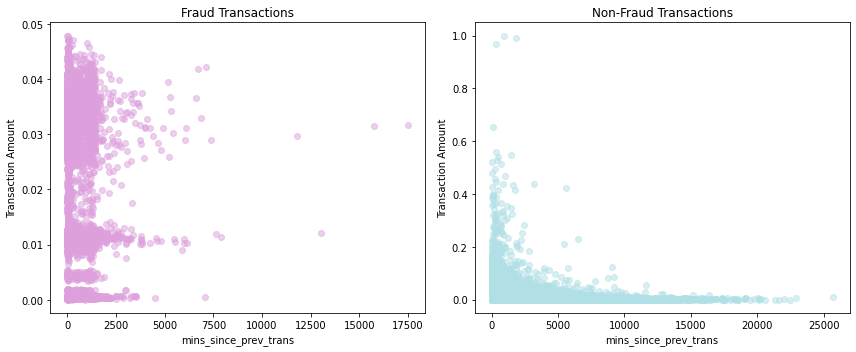

In [15]:
fraud_transactions = df[df['is_fraud'] == 1]
non_fraud_transactions = df[df['is_fraud'] == 0]

# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting fraud transactions
axs[0].scatter(fraud_transactions['mins_since_prev_trans'], fraud_transactions['amt'], color='plum', alpha=0.5)
axs[0].set_xlabel('mins_since_prev_trans')
axs[0].set_ylabel('Transaction Amount')
axs[0].set_title('Fraud Transactions')

# Plotting non-fraud transactions
axs[1].scatter(non_fraud_transactions['mins_since_prev_trans'], non_fraud_transactions['amt'], color='powderblue', alpha=0.5)
axs[1].set_xlabel('mins_since_prev_trans')
axs[1].set_ylabel('Transaction Amount')
axs[1].set_title('Non-Fraud Transactions')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
"""
cols = ['lat',	'long',	'city_pop',	'age',	'total_trans_num', 'mins_since_prev_trans', 'merch_lat',	'merch_long']

df[cols] = scaler.fit_transform(df[cols])
"""

"\ncols = ['lat',\t'long',\t'city_pop',\t'age',\t'total_trans_num', 'mins_since_prev_trans', 'merch_lat',\t'merch_long']\n\ndf[cols] = scaler.fit_transform(df[cols])\n"

## encoding

In [22]:
dic = {"F": 1, "M": 0}
df["gender"] = df["gender"].map(dic)
df_test["gender"] = df_test["gender"].map(dic)

In [23]:
columns_to_freq_encode = ['cc_num', 'merchant', 'city', 'street', 'state', 'zip']
# columns_to_count_encode = ['cc_num', 'merchant', 'city', 'street', 'state', 'zip']
columns_to_target_encode = ['job']
columns_to_onehot_encode = ['category']

In [ ]:
!pip install category_encoders

In [24]:
import category_encoders as ce

# Create a target encoding instance
target_encoder = ce.TargetEncoder(cols=columns_to_target_encode)

# Fit and transform the 'job' feature
df['job'] = target_encoder.fit_transform(df['job'], df['is_fraud'])

df_test['job'] = target_encoder.fit_transform(df_test['job'], df_test['is_fraud'])

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['category']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category']))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)



encoded_features = encoder.fit_transform(df_test[['category']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category']))

# Concatenate the original DataFrame with the encoded DataFrame
df_test = pd.concat([df_test, encoded_df], axis=1)

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
df.drop('category', axis=1, inplace=True)
df_test.drop('category', axis=1, inplace=True)

In [27]:
def frequency_encoding(df, columns):
    ans = df.copy()
    for col in columns:
        freq_encode = df[col].value_counts(normalize=True).to_dict()
        ans[col] = df[col].map(freq_encode)
    return ans

df = frequency_encoding(df, columns_to_freq_encode)
df_test = frequency_encoding(df_test, columns_to_freq_encode)

df.head(5)

,index,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,date,weekday,age,total_trans_num,avg_amt,mins_since_prev_trans,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,330201,2019-06-06 14:43:31,0.001553,0.000624,0.000201,Melissa,Krause,1,0.001553,0.001553,0.016170,0.001553,30.6576,-91.6264,1178,0.003104,1951-06-13,f3ac97659cc47c9bc0ecec59ed82cdfc,1338993811,31.189017,-91.426377,0,2019,6,6,14,2019-06-06,3,68,1611,0.002213,827.316667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,798518,2019-12-03 19:26:48,0.002351,0.001549,0.000700,Sharon,Johnson,1,0.002351,0.003554,0.014623,0.002351,48.3400,-122.3456,85,0.006311,1984-09-01,d446bcc2bf6386d769f62931983f5573,1354562808,47.373663,-122.739095,0,2019,12,3,19,2019-12-03,1,35,2439,0.001932,62.550000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1260375,2020-06-08 12:02:43,0.001195,0.002818,0.001272,Debra,Stark,1,0.001195,0.001195,0.073251,0.001195,32.3836,-94.8653,24536,0.004243,1983-10-14,fd829fdc4c0beee7a7feccec99e441cd,1370692963,31.989881,-95.371119,0,2020,6,8,12,2020-06-08,0,36,1240,0.003286,268.350000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,412511,2019-07-06 01:46:54,0.001185,0.000696,0.001505,Jeffrey,Munoz,0,0.001185,0.001185,0.035679,0.001185,44.8605,-85.8138,3096,0.000000,1975-10-11,9cd84586238291b8f64e25931d211539,1341539214,45.377530,-86.450595,0,2019,7,6,1,2019-07-06,5,43,1229,0.002319,414.966667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,344644,2019-06-10 23:34:00,0.001190,0.001738,0.002053,Karen,Ryan,1,0.001190,0.001190,0.033443,0.001190,41.5378,-88.0572,128354,0.003893,1992-01-20,e63a64d507462095e9e31303bf1a6401,1339371240,42.372906,-87.112752,0,2019,6,10,23,2019-06-10,0,27,1234,0.003309,10.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
"""
# Create a count encoder instance
count_encoder = ce.CountEncoder(cols=columns_to_count_encode)

# Fit and transform the selected columns
df_c_encoded = count_encoder.fit_transform(df)

df_c_encoded.head(5)
"""

'\n# Create a count encoder instance\ncount_encoder = ce.CountEncoder(cols=columns_to_count_encode)\n\n# Fit and transform the selected columns\ndf_c_encoded = count_encoder.fit_transform(df)\n\ndf_c_encoded.head(5)\n'

In [28]:
# df_c_encoded.drop(columns=["index", "trans_date_trans_time","first", "last", "dob", "trans_num", "unix_time", "year", "date"], inplace=True)
df.drop(columns=["index", "trans_date_trans_time","first", "last", "dob", "trans_num", "unix_time", "year", "date"], inplace=True)

df_test.drop(columns=["index", "trans_date_trans_time","first", "last", "dob", "trans_num", "unix_time", "year", "date"], inplace=True)

In [29]:
df['mins_since_prev_trans'] = df['mins_since_prev_trans'].replace(-1, df['mins_since_prev_trans'].max()**2)
df_test['mins_since_prev_trans'] = df_test['mins_since_prev_trans'].replace(-1, df_test['mins_since_prev_trans'].max()**2)
df

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,month,day,hour,weekday,age,total_trans_num,avg_amt,mins_since_prev_trans,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0.001553,0.000624,0.000201,1,0.001553,0.001553,0.016170,0.001553,30.6576,-91.6264,1178,0.003104,31.189017,-91.426377,0,6,6,14,3,68,1611,0.002213,827.316667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002351,0.001549,0.000700,1,0.002351,0.003554,0.014623,0.002351,48.3400,-122.3456,85,0.006311,47.373663,-122.739095,0,12,3,19,1,35,2439,0.001932,62.550000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001195,0.002818,0.001272,1,0.001195,0.001195,0.073251,0.001195,32.3836,-94.8653,24536,0.004243,31.989881,-95.371119,0,6,8,12,0,36,1240,0.003286,268.350000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001185,0.000696,0.001505,0,0.001185,0.001185,0.035679,0.001185,44.8605,-85.8138,3096,0.000000,45.377530,-86.450595,0,7,6,1,5,43,1229,0.002319,414.966667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001190,0.001738,0.002053,1,0.001190,0.001190,0.033443,0.001190,41.5378,-88.0572,128354,0.003893,42.372906,-87.112752,0,6,10,23,0,27,1234,0.003309,10.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,0.000805,0.001995,0.002606,1,0.000805,0.000805,0.022681,0.000805,45.8327,-91.0144,1478,0.007898,45.043710,-90.231846,0,3,4,2,0,53,835,0.002283,319.766667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037336,0.000785,0.001937,0.000049,1,0.000785,0.000785,0.005890,0.000785,41.4682,-72.5751,5438,0.005276,40.711495,-71.670634,0,5,9,6,3,54,814,0.002722,2958.233333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1037337,0.000758,0.001808,0.004282,1,0.000758,0.000758,0.012574,0.000758,35.0203,-106.5503,310,0.006350,34.849069,-106.219762,0,3,13,21,2,40,786,0.001888,1043.933333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037338,0.000818,0.001813,0.000168,0,0.000818,0.000818,0.024367,0.000818,48.6669,-96.5969,140,0.006369,47.807830,-97.498754,0,10,13,9,6,77,849,0.002456,389.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


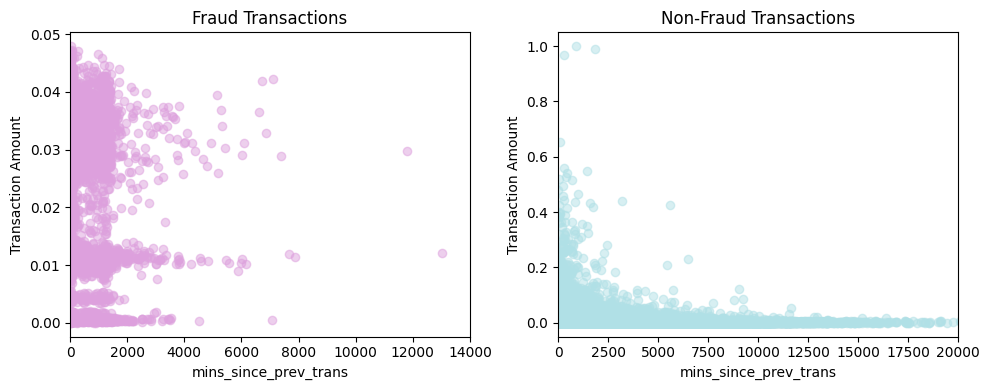

In [ ]:
fraud_transactions = df[df['is_fraud'] == 1]
non_fraud_transactions = df[df['is_fraud'] == 0]

# Create a figure with two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting fraud transactions
axs[0].scatter(fraud_transactions['mins_since_prev_trans'], fraud_transactions['amt'], color='plum', alpha=0.5)
axs[0].set_xlabel('mins_since_prev_trans')
axs[0].set_ylabel('Transaction Amount')
axs[0].set_title('Fraud Transactions')
axs[0].set_xlim(0, 14000)

# Plotting non-fraud transactions
axs[1].scatter(non_fraud_transactions['mins_since_prev_trans'], non_fraud_transactions['amt'], color='powderblue', alpha=0.5)
axs[1].set_xlabel('mins_since_prev_trans')
axs[1].set_ylabel('Transaction Amount')
axs[1].set_title('Non-Fraud Transactions')
axs[1].set_xlim(0, 20000)

# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
df

,cc_num,merchant,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,month,day,hour,weekday,age,total_trans_num,avg_amt,mins_since_prev_trans,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0.001553,0.000624,0.000201,1,0.001553,0.001553,0.016170,0.001553,30.6576,-91.6264,1178,0.003104,31.189017,-91.426377,0,6,6,14,3,68,1611,0.002213,827.316667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002351,0.001549,0.000700,1,0.002351,0.003554,0.014623,0.002351,48.3400,-122.3456,85,0.006311,47.373663,-122.739095,0,12,3,19,1,35,2439,0.001932,62.550000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001195,0.002818,0.001272,1,0.001195,0.001195,0.073251,0.001195,32.3836,-94.8653,24536,0.004243,31.989881,-95.371119,0,6,8,12,0,36,1240,0.003286,268.350000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001185,0.000696,0.001505,0,0.001185,0.001185,0.035679,0.001185,44.8605,-85.8138,3096,0.000000,45.377530,-86.450595,0,7,6,1,5,43,1229,0.002319,414.966667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001190,0.001738,0.002053,1,0.001190,0.001190,0.033443,0.001190,41.5378,-88.0572,128354,0.003893,42.372906,-87.112752,0,6,10,23,0,27,1234,0.003309,10.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,0.000805,0.001995,0.002606,1,0.000805,0.000805,0.022681,0.000805,45.8327,-91.0144,1478,0.007898,45.043710,-90.231846,0,3,4,2,0,53,835,0.002283,319.766667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037336,0.000785,0.001937,0.000049,1,0.000785,0.000785,0.005890,0.000785,41.4682,-72.5751,5438,0.005276,40.711495,-71.670634,0,5,9,6,3,54,814,0.002722,2958.233333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1037337,0.000758,0.001808,0.004282,1,0.000758,0.000758,0.012574,0.000758,35.0203,-106.5503,310,0.006350,34.849069,-106.219762,0,3,13,21,2,40,786,0.001888,1043.933333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037338,0.000818,0.001813,0.000168,0,0.000818,0.000818,0.024367,0.000818,48.6669,-96.5969,140,0.006369,47.807830,-97.498754,0,10,13,9,6,77,849,0.002456,389.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.columns

Index(['cc_num', 'merchant', 'amt', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'month', 'day', 'hour', 'weekday', 'age', 'total_trans_num', 'avg_amt',
       'mins_since_prev_trans', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

<Axes: >

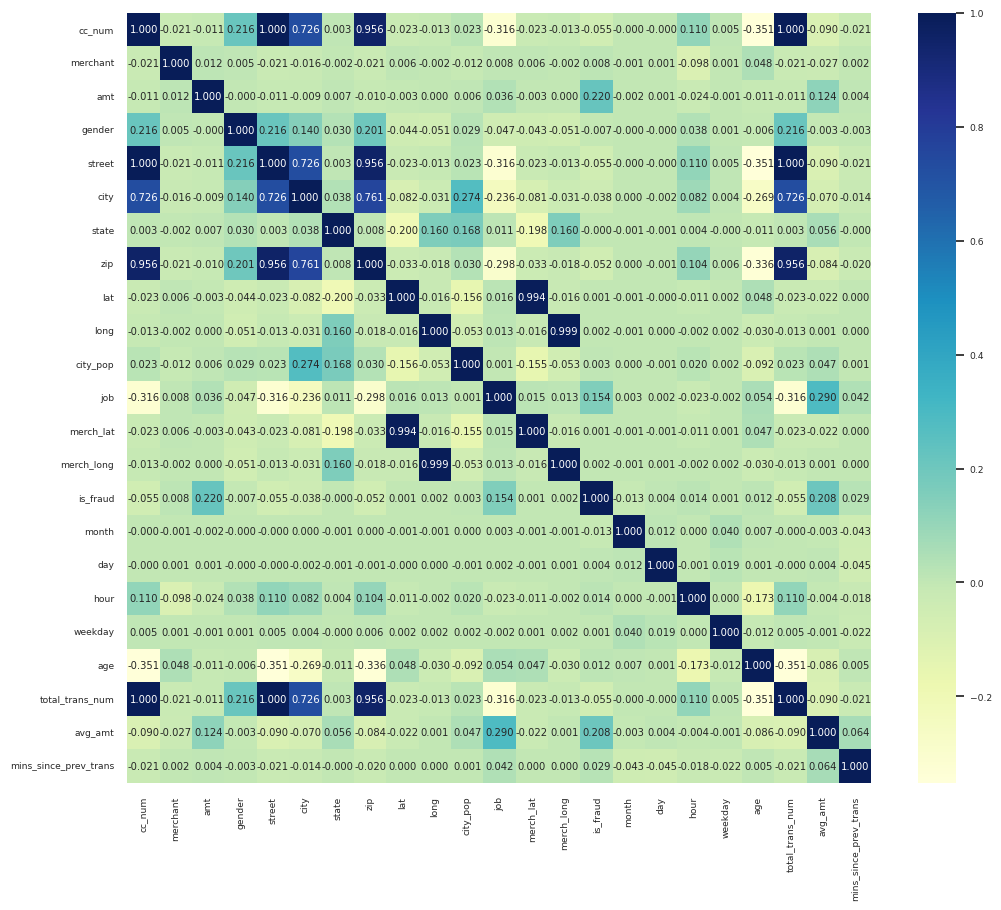

In [ ]:
numeric_columns = df[['cc_num', 'merchant', 'amt', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud',
       'month', 'day', 'hour', 'weekday', 'age', 'total_trans_num', 'avg_amt',
       'mins_since_prev_trans']]

corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.6)
sns.heatmap(corr_matrix, annot=True,fmt='.3f',cmap="YlGnBu")

In [30]:
df.drop(columns=['street', 'total_trans_num', 'merch_lat', 'merch_long'], inplace = True)
df_test.drop(columns=['street', 'total_trans_num', 'merch_lat', 'merch_long'], inplace = True)

<Axes: >

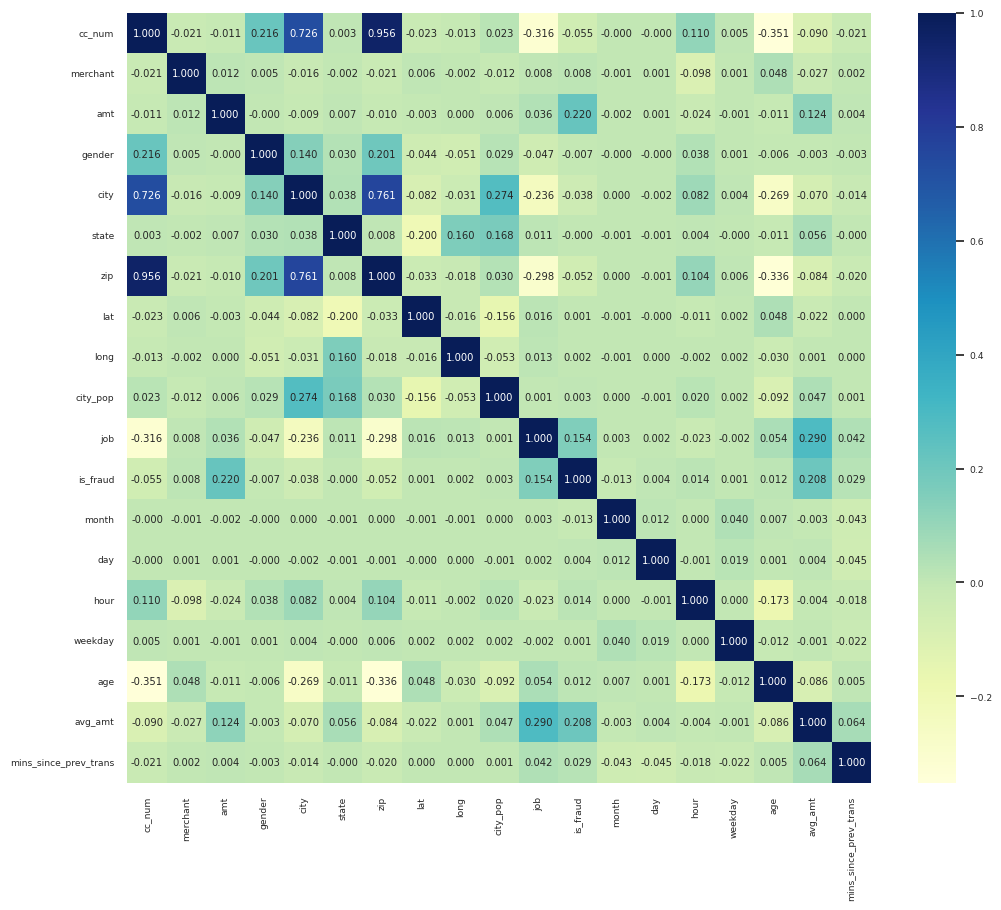

In [ ]:
numeric_columns = df[['cc_num', 'merchant', 'amt', 'gender', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'is_fraud',
       'month', 'day', 'hour', 'weekday', 'age', 'avg_amt',
       'mins_since_prev_trans']]

corr_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.set(font_scale=0.6)
sns.heatmap(corr_matrix, annot=True,fmt='.3f',cmap="YlGnBu")

## train the models

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA


X_train_prep = df.drop('is_fraud', axis=1)  # Features (independent variables)
y_train_prep = df['is_fraud']  # Target variable (dependent variable)


X_test_prep = df_test.drop('is_fraud', axis=1)  # Features (independent variables)
y_test_prep = df_test['is_fraud']  # Target variable (dependent variable)


def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, scaling=False, oversampling=False):
    if scaling:
        # Scale the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)

    if oversampling:
        # Perform oversampling
        oversampler = SMOTE(random_state=42)
        X_train, y_train = oversampler.fit_resample(X_train, y_train)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on train
    y_train_pred = classifier.predict(X_train)

    # Calculate evaluation metrics
    accuracy_train = accuracy_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Print evaluation metrics
    print("Training Set:")
    print("Accuracy:", accuracy_train)
    print("AUC:", auc_train)
    print("F1 Score:", f1_train)
    print("Confusion Matrix:")
    print(cm_train)


    
    # Make predictions on test
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print("Testing Set:")
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(cm)

    return classifier

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc(model, X_test, y_test):
    # Compute predicted probabilities for the test set
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute the false positive rate, true positive rate, and threshold values for the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Compute the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Training Set:
Accuracy: 0.8522553846690855
AUC: 0.8522553846690855
F1 Score: 0.8440816259706718
Confusion Matrix:
[[933044  98310]
 [206444 824910]]


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Testing Set:
Accuracy: 0.9941388551487458
AUC: 0.5
F1 Score: 0.0
Confusion Matrix:
[[257815      0]
 [  1520      0]]


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


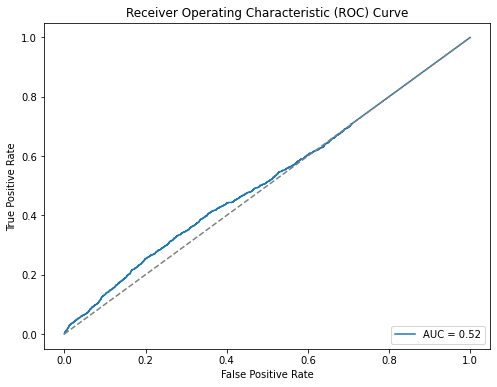

In [34]:
# Logistic Regression Classifier
logreg = LogisticRegression(max_iter = 2000)
logreg = evaluate_classifier(logreg, X_train_prep, y_train_prep, X_test_prep, y_test_prep, True, True)
plot_auc(logreg, X_test_prep, y_test_prep)

c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Set:
Accuracy: 0.5000014543987806
AUC: 0.5000014543987806
F1 Score: 0.6666673130667515
Confusion Matrix:
[[      3 1031351]
 [      0 1031354]]
Testing Set:
Accuracy: 0.010145179015559025
AUC: 0.4988845658402547
F1 Score: 0.011627727895766275
Confusion Matrix:
[[  1121 256694]
 [    10   1510]]


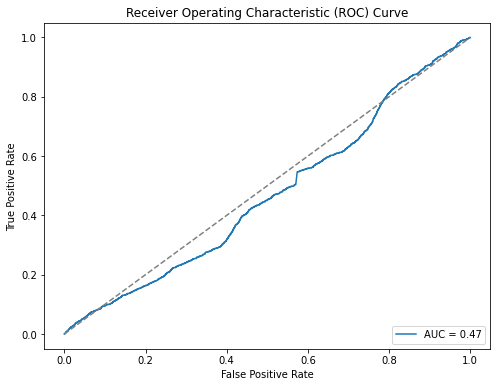

In [36]:
# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(max_iter = 500, probability= True)
svm_classifier = evaluate_classifier(svm_classifier, X_train_prep, y_train_prep, X_test_prep, y_test_prep, False, True)
plot_auc(svm_classifier, X_test_prep, y_test_prep)

In [23]:
# Randomly sample a fraction of the data
fraction = 0.3  
num_samples = int(fraction * X_train_prep.shape[0])
random_indices = np.random.choice(X_train_prep.shape[0], num_samples, replace=False)
X_sampled =  X_train_prep.loc[random_indices]
y_sampled = y_train_prep.loc[random_indices]
# K-nearest neighbor (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=4)
evaluate_classifier(knn, np.array(X_sampled), np.array(y_sampled), np.array(X_test_prep), np.array(y_test_prep), False, True)

Training Set:
Accuracy: 0.9847473676726283
AUC: 0.9847473676726283
F1 Score: 0.9848430105869298
Confusion Matrix:
[[302750   6672]
 [  2767 306655]]
Testing Set:
Accuracy: 0.9492124086606127
AUC: 0.5542512187441627
F1 Score: 0.03445495198299245
Confusion Matrix:
[[245929  11886]
 [  1285    235]]


Training Set:
Accuracy: 1.0
AUC: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1031354       0]
 [      0 1031354]]
Testing Set:
Accuracy: 0.9938226618080861
AUC: 0.8638008677682998
F1 Score: 0.5815047021943573
Confusion Matrix:
[[256620   1195]
 [   407   1113]]


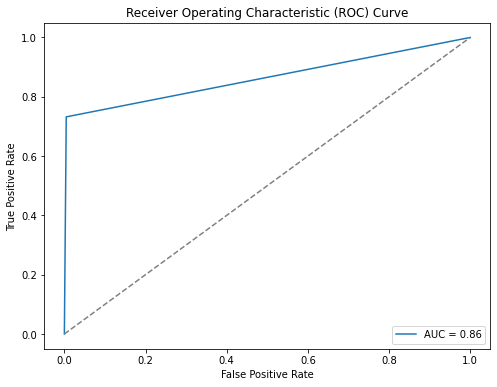

In [42]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt = evaluate_classifier(dt, X_train_prep, y_train_prep, X_test_prep, y_test_prep, False, True)
plot_auc(dt,X_test_prep, y_test_prep)

In [24]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf = evaluate_classifier(rf, X_train_prep, y_train_prep, X_test_prep, y_test_prep, True, True)
plot_auc(rf, X_test_prep, y_test_prep)

Training Set:
Accuracy: 1.0
AUC: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1031354       0]
 [      0 1031354]]


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Testing Set:
Accuracy: 0.9915630362272736
AUC: 0.5013205613572359
F1 Score: 0.007259528130671507
Confusion Matrix:
[[257139    676]
 [  1512      8]]


Training Set:
Accuracy: 0.789927609724692
AUC: 0.789927609724692
F1 Score: 0.7633502489279387
Confusion Matrix:
[[930523 100831]
 [332487 698867]]


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Testing Set:
Accuracy: 0.0069601095108643265
AUC: 0.49826366595998556
F1 Score: 0.011613626245413653
Confusion Matrix:
[[   292 257523]
 [     7   1513]]


c:\Users\Windows10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


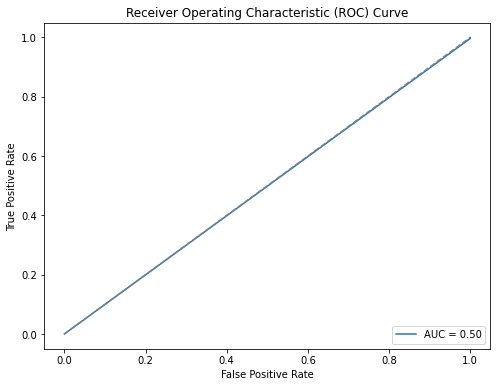

In [41]:
# Naive Bayes Classifier
nb = GaussianNB()
nb = evaluate_classifier(nb, X_train_prep, y_train_prep, X_test_prep, y_test_prep, True, True)
plot_auc(nb, X_test_prep, y_test_prep)

## Pipeline

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

# Custom transformer for SMOTE
class SMOTETransformer:
    def __init__(self, random_state=42):
        self.smote = SMOTE(random_state=random_state)
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        X_resampled, _ = self.smote.fit_resample(X, y)
        return X_resampled


def remove_fraud_prefix(df):
    df['merchant'] = df['merchant'].replace('fraud_', '', 1)
    return df

def convert_to_datetime(df):
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    return df


pipeline = Pipeline([
    ('convert_to_datetime', FunctionTransformer(convert_to_datetime)),
    ('drop_column', ColumnTransformer(
        transformers=[
            ('drop', 'drop', [0])
        ],
        remainder='passthrough'
    )),
    ('remove_fraud_prefix', FunctionTransformer(remove_fraud_prefix)),
    ('scaler', ColumnTransformer([
        ('scale_amt', MinMaxScaler(), ['amt'])
    ], remainder='passthrough')),
    ('extract_datetime', ColumnTransformer([
        ('extract_features', FunctionTransformer(lambda X: pd.DataFrame({
            'year': X['trans_date_trans_time'].dt.year,
            'month': X['trans_date_trans_time'].dt.month,
            'day': X['trans_date_trans_time'].dt.day,
            'hour': X['trans_date_trans_time'].dt.hour,
            'date': X['trans_date_trans_time'].dt.date,
            'weekday': X['trans_date_trans_time'].dt.dayofweek,
            'age': (X['trans_date_trans_time'] - X['dob']).dt.days // 365
        })))
    ], remainder='drop')),
    ('calculate_avg_amt', FunctionTransformer(lambda X: X.assign(
        avg_amt=X.groupby(['cc_num', 'first', 'last'])['amt'].transform('mean')
    ))),
    ('calculate_mins_since_prev_trans', FunctionTransformer(lambda X: X.assign(
        mins_since_prev_trans=X.sort_values(['cc_num', 'trans_date_trans_time'])
            .groupby(['cc_num', 'first', 'last'])['trans_date_trans_time'].diff()
            .dt.total_seconds() / 60
    ))),
    ('fillna', FunctionTransformer(lambda X: X.assign(
        mins_since_prev_trans=X['mins_since_prev_trans'].fillna(-1)
    ))),
    ('replace_neg_values', FunctionTransformer(lambda X: X.assign(
        mins_since_prev_trans=X['mins_since_prev_trans'].replace(-1, X['mins_since_prev_trans'].max()**2)
    ))),
    ('target_encode_job', FunctionTransformer(lambda X: X.assign(
        job=ce.TargetEncoder(cols='job').fit_transform(X['job'], X['is_fraud'])
    ))),
    ('map_gender', FunctionTransformer(lambda X: X.assign(
        gender=X['gender'].map({"F": 1, "M": 0})
    ))),
    ('one_hot_encode_category', FunctionTransformer(lambda X: pd.get_dummies(X, columns=['category']))),
    ('drop_category', FunctionTransformer(lambda X: X.drop(columns=['category']))),
    ('frequency_encode_columns', FunctionTransformer(lambda X: X.assign(
        **{col: X[col].map(X[col].value_counts(normalize=True)) for col in ['cc_num', 'merchant', 'city', 'street', 'state', 'zip']}
    ))),
    ('drop_columns', FunctionTransformer(lambda X: X.drop(columns=['street', 'total_trans_num', 'merch_lat', 'merch_long']))),
    ('oversampling', SMOTETransformer()),  # Use the custom SMOTETransformer
    ('classification_model', DecisionTreeClassifier())
])

# Fit the pipeline to the train data
pipeline.fit(X_train, y_train)

# Predict usingthe fitted pipeline
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("test Set:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)